In [62]:
#Loading the DataSet

import pandas as pd
df=pd.read_csv("user_outputs.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


In [63]:
# Finding missing values if any
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Age              0
Outcome          0
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


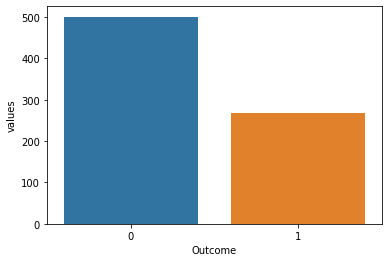

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

temp=df["Outcome"].value_counts()
temp_df= pd.DataFrame({'Outcome': temp.index,'values': temp.values})
print(sns.barplot(x = 'Outcome', y="values", data=temp_df))

In [65]:
# Fining correlations to ensure that all values effect outcome
corr=df.corr()
print(corr)

               Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
Pregnancies       1.000000  0.129674       0.138805      -0.081983 -0.073338   
Glucose           0.129674  1.000000       0.149056       0.056714  0.331554   
BloodPressure     0.138805  0.149056       1.000000       0.209186  0.086542   
SkinThickness    -0.081983  0.056714       0.209186       1.000000  0.436140   
Insulin          -0.073338  0.331554       0.086542       0.436140  1.000000   
BMI               0.017395  0.220501       0.282452       0.392961  0.197448   
Age               0.544290  0.263444       0.237923      -0.113903 -0.042169   
Outcome           0.221478  0.465782       0.067718       0.075444  0.130098   

                    BMI       Age   Outcome  
Pregnancies    0.017395  0.544290  0.221478  
Glucose        0.220501  0.263444  0.465782  
BloodPressure  0.282452  0.237923  0.067718  
SkinThickness  0.392961 -0.113903  0.075444  
Insulin        0.197448 -0.042169  0.130098  
BMI

AxesSubplot(0.125,0.125;0.62x0.755)


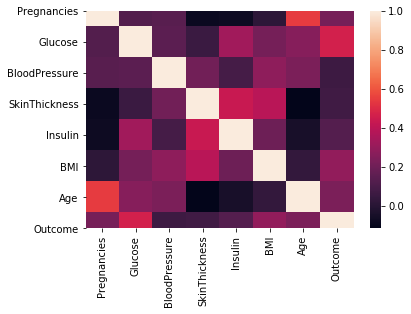

In [66]:
# Heatmap for better representation
heatmap=sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)
print(heatmap)

In [67]:
y=df['Outcome']
x=df.drop('Outcome',axis=1)

In [68]:
# Apply smote
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=589)
X,Y=sm.fit_sample(x,y)

In [69]:
# Test-Train Split
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 5)

In [70]:
list_met=[]
list_accuracy=[]
# Applying all the algorithms

In [71]:
# Apply Logistic Regression


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

classifier = LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
lr=classifier.fit(x_train, y_train)
#Preciction
y_pred = classifier.predict(x_test)
#Accuracy
accuracy_LR= accuracy_score(y_test, y_pred)



In [73]:
# Apply Decison Tree


In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

classifier2 = DecisionTreeClassifier(random_state=14)
dt=classifier2.fit(x_train, y_train)
#Preciction
y_pred2 = classifier2.predict(x_test)
#Accuracy
accuracy_DT= accuracy_score(y_test, y_pred2)


In [75]:
# Apply Random Forest criteria=information gain

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

classifier3 = RandomForestClassifier(random_state=14)
rfi=classifier3.fit(x_train, y_train)
#Preciction
y_pred3 = classifier3.predict(x_test)
#Accuracy
accuracy_RFI= accuracy_score(y_test, y_pred3)


In [77]:
# Apply Random Forest criteria=entropy

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

classifier4 = RandomForestClassifier(criterion='entropy')
rfe=classifier4.fit(x_train, y_train)
#Preciction
y_pred4 = classifier4.predict(x_test)
#Accuracy
accuracy_RFE= accuracy_score(y_test, y_pred4)


In [79]:
# similarly apply SVM

In [80]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

model_svm = SVC(cache_size=100)
svm=model_svm.fit(x_train, y_train)
#Preciction
y_pred5 = model_svm.predict(x_test)
#Accuracy
accuracy_svc= accuracy_score(y_test, y_pred5)


In [81]:
# Apply KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

model_knn3 = KNeighborsClassifier(n_neighbors=3)
knn=model_knn3.fit(x_train,y_train)
# Predicting Test Set N=3
pred_knn3= model_knn3.predict(x_test)
#Accuracy
accuracy_SVM = accuracy_score(y_test, pred_knn3)


In [83]:
#Apply Gaussian Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

gnb = GaussianNB()
gnb=gnb.fit(x_train, y_train)
# Predicting Test Set
pred_gnb = gnb.predict(x_test)
#accuracy
accuracy_GNB = accuracy_score(y_test, pred_gnb)


In [85]:
#Apply Bernoulli Naive Bayes

In [86]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

model = BernoulliNB()
bnb=model.fit(x_train, y_train)
# Predicting Test Set
pred_bnb = model.predict(x_test)
#accuracy
accuracy_BNB = accuracy_score(y_test, pred_bnb)


In [87]:
# Combining all the above using voting classifier

In [88]:
from sklearn.ensemble import VotingClassifier

evc=VotingClassifier(estimators=[('lr', lr), ('rfi', rfi),('rfe', rfe), ('DT', dt),
                                 ('svm',svm),('knn',knn),('gnb',gnb),('bnb',bnb)],voting='hard',
                                 flatten_transform=True)

model_evc=evc.fit(x_train, y_train)
# Predicting Test Set
pred_evc = evc.predict(x_test)
#accuracy
accuracy_evc = accuracy_score(y_test, pred_gnb)


In [89]:
list1=['Logistic Regression','Decison Tree','Random Forest(information gain)','Random Forest(Entropy)','SVM','KNN','gnb','bnb','voting classifier']

In [90]:
list2=[accuracy_LR,accuracy_DT,accuracy_RFI,accuracy_RFE,accuracy_svc,accuracy_SVM,accuracy_GNB,accuracy_BNB,accuracy_evc]
list3=[classifier,classifier2,classifier3,classifier4,model_svm,model_knn3,gnb,model]

In [91]:
df_Accuracy=pd.DataFrame({'Method Used':list1,'Accuracy': list2})
print(df_Accuracy)

                       Method Used  Accuracy
0              Logistic Regression  0.736318
1                     Decison Tree  0.756219
2  Random Forest(information gain)  0.756219
3           Random Forest(Entropy)  0.766169
4                              SVM  0.726368
5                              KNN  0.711443
6                              gnb  0.706468
7                              bnb  0.467662
8                voting classifier  0.706468


AxesSubplot(0.125,0.125;0.775x0.755)


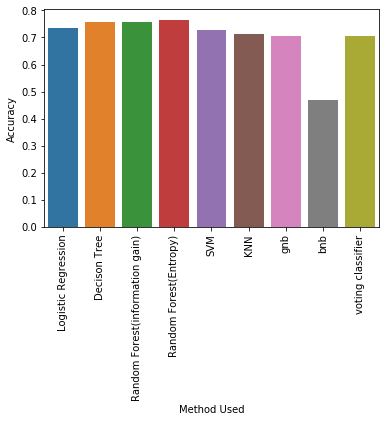

In [92]:
chart=sns.barplot(x='Method Used',y='Accuracy',data=df_Accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

In [99]:
# Creating input

import pandas as pd
import random
import time


list_preg=[]
list_gluc=[]
list_blood_pressure=[]
list_skin_thickness=[]
list_insulin=[]
list_bmi=[]
list_age=[]
list_pedigree=[]

def prediction():
    '''
    input1=input("Enter no. of Pregnencies :")
    input2=input("Enter glucose level :")
    input3=input("Enter blood pressure :")
    input4=input("Enter skin thickness :")
    input5=input("Enter insulin level :")
    input6=input("Enter bmi :")
    input7=input("Enter age :")
    '''
    input1= random.randrange(0, 41)     #Number of times pregenant
    input2= random.randrange(0, 201)    #Gloucouse level
    input3= random.randrange(0, 111)     #Average heart level
    input4= random.randrange(1, 60)     #Skin thickness
    input5= random.randrange(0, 251)     #Insuline level
    input6= random.randrange(15, 46)     #BMI
    input7= random.randrange(1, 101)    #Age
    
    start = time.time()


    list_preg.append(input1)
    list_gluc.append(input2)
    list_blood_pressure.append(input3)
    list_skin_thickness.append(input4)
    list_insulin.append(input5)
    list_bmi.append(input6)
    list_age.append(input7)


    input_df=pd.DataFrame({"Enter no. of Pregnencies :":list_preg , "Enter glucose level :":list_gluc ,
                              "Enter blood pressure :":list_blood_pressure , "Enter skin thickness :":list_skin_thickness ,
                             "Enter insulin level :":list_insulin , "Enter bmi :":list_bmi , "Enter age :":list_age
                             })
    
    max_acc=max(list2)
    
    for i in range(0,len(list2)):
        if(list2[i]==max_acc):
            sel_model=list3[i]
            
    prediction=sel_model.predict(input_df)

    if(prediction==0):
        print("You are safe")
        print('our output is accurate by: ' + str(max_acc*100)+'%')

    elif(prediction==1):
        print("Doesnt look good,Please confirm with doctor")
        print('our output is accurate by: ' + str(max_acc*100)+'%')
        
    end = time.time()
    
    print('time to calculate: '+str(end- start)+' mili Seconds')
    
prediction()

Doesnt look good,Please confirm with doctor
our output is accurate by: 76.61691542288557%
time to calculate: 0.03799271583557129 mili Seconds


In [100]:
import csv 

input_out=input("Do you have Diabetes?:")

list_out=[]
list_out.append(input_out)

final_df=pd.DataFrame({"Pregnancies":list_preg , "Glucose":list_gluc ,
                              "BloodPressure":list_blood_pressure , "SkinThickness":list_skin_thickness ,
                             "Insulin":list_insulin , "BMI":list_bmi , "Age":list_age,"Outcome":list_out
                             })

initial_df=df
df_final=pd.concat([initial_df,final_df],axis=0)
print(df_final.tail())
df_final.to_csv("user_outputs.csv",index=False)

Do you have Diabetes?:0
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age  \
765            5      121             72             23      112  26.2   30   
766            1      126             60              0        0  30.1   47   
767            1       93             70             31        0  30.4   23   
768            5      139              5              8      127  27.0   33   
0              1      148             56             47      177  42.0   37   

    Outcome  
765       0  
766       1  
767       0  
768       0  
0         0  
